# Jupyter - Day 20 - Section 002
# Lecture 20 - PCA 


In [3]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# 1. PCA on Penguins
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to again use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. You should have done this in a previous notebook, but if you don't have the package installed to get the data, you can run 
```
pip install palmerpenguins
```
to have access to the data. 

In [4]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

#Shuffle the data
# penguins = penguins.sample(frac=1)
penguins.head()


/home/monislow/.local/lib/python3.12/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

Before we get to the full version, let's just take a look at two of the columns: flipper length and bill length. A nice thing we can do is to also color the data by which species label the data point has. 

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

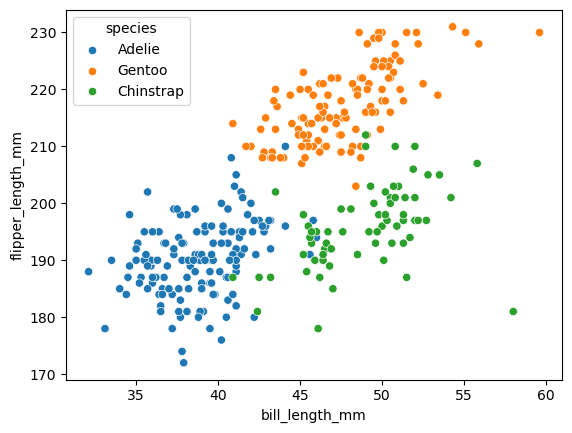

In [5]:
sns.scatterplot(x = penguins.bill_length_mm, 
                y = penguins.flipper_length_mm, 
                hue = penguins.species)

Before we get to it, we're going to just work with the columns that are numeric.  

In [6]:
penguins_num = penguins.select_dtypes(np.number)
penguins_num.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0            39.1           18.7              181.0       3750.0  2007
1            39.5           17.4              186.0       3800.0  2007
2            40.3           18.0              195.0       3250.0  2007
4            36.7           19.3              193.0       3450.0  2007
5            39.3           20.6              190.0       3650.0  2007

We will also use mean centered data to make the visualization easier (meaning shifting our data to have mean 0 in every column, and have standard deviation 1). 

In [7]:
p_normalized = (penguins_num - penguins_num.mean())/penguins_num.std()
p_normalized.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g      year
0       -0.894695       0.779559          -1.424608    -0.567621 -1.281813
1       -0.821552       0.119404          -1.067867    -0.505525 -1.281813
2       -0.675264       0.424091          -0.425733    -1.188572 -1.281813
4       -1.333559       1.084246          -0.568429    -0.940192 -1.281813
5       -0.858123       1.744400          -0.782474    -0.691811 -1.281813

## PCA with just two input columns

To try to draw pictures similar to what we just saw on the slides, we'll first focus on two of the columns. 

In [8]:
penguins_subset2 = p_normalized[['bill_length_mm', 'flipper_length_mm']]
penguins_subset2

bill_length_mm  flipper_length_mm
0         -0.894695          -1.424608
1         -0.821552          -1.067867
2         -0.675264          -0.425733
4         -1.333559          -0.568429
5         -0.858123          -0.782474
..              ...                ...
339        2.159064           0.430446
340       -0.090112           0.073705
341        1.025333          -0.568429
342        1.244765           0.644491
343        1.135049          -0.211688

[333 rows x 2 columns]

We run PCA using the `PCA` command from `scikitlearn`.

In [9]:
from sklearn.decomposition import PCA

In [10]:
# Set up the PCA object
pca = PCA(n_components=2)

# Fit it using our data
pca.fit(penguins_subset2.values)

PCA(n_components=2)

Text(0, 0.5, 'PC2')

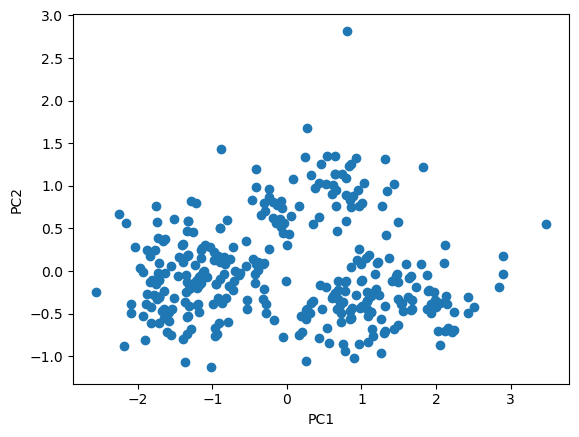

In [11]:
pca_df = pca.fit_transform(penguins_subset2.values)
plt.scatter(pca_df[:,0], pca_df[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

The `pca.components_` store information about the lines we are going to project our data onto. Specifically, each row gives us one of these lines.

In [12]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

(np.float64(-2.4261469084390344),
 np.float64(3.1053642574684943),
 np.float64(-2.277218996642162),
 np.float64(3.2542921692653666))

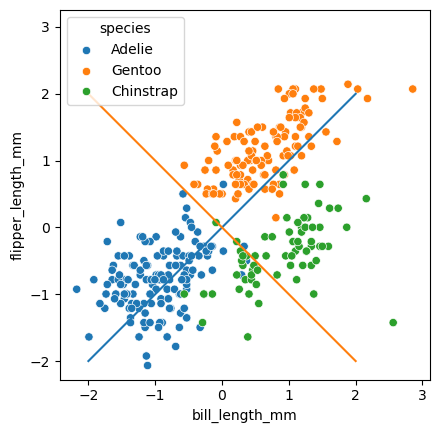

In [13]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, comp in enumerate(pca.components_):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
plt.axis('square')

A common way to look at the relative importance of the PC's is to draw these components as vectors with length based on the explained variance. 

In [14]:
pca.explained_variance_

array([1.65309564, 0.34690436])

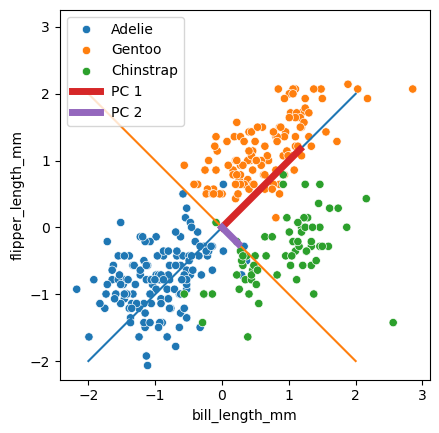

In [15]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"PC {i+1}",
        linewidth=5,
        color=f"C{i + 3}",
    )

plt.axis('square')
plt.legend()

The next important part are the PC's, which we can get from the `pca` object as follows. I'm going to put them in a dataframe to make drawing and visualization easier. Basically, $PC_1$ is our $Z_1$ in the slides, and $PC_2$ is the $Z_2$.

In [16]:
# The transform function takes in bill,flipper data points, 
# and returns a PC1,PC2 coordinate for each one. 
penguins_pca = pca.fit_transform(penguins_subset2)
penguins_pca = pd.DataFrame(data = penguins_pca, columns = ['PC1', 'PC2'])
penguins_pca.shape

(333, 2)

In [17]:
penguins.species

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

This is the scatterplot of the data points transformed into the PC space. 

<Axes: xlabel='PC1', ylabel='PC2'>

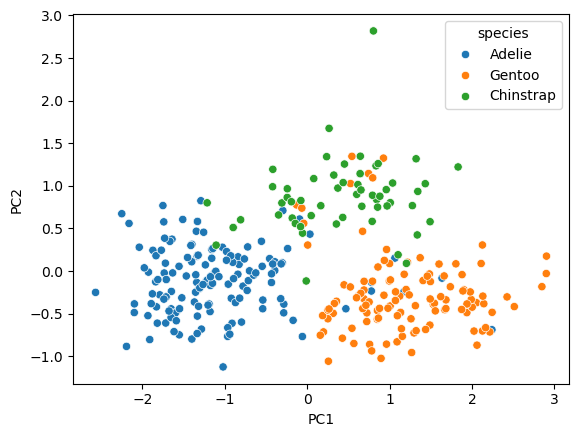

In [18]:
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2',hue = penguins.species)

&#9989; **<font color=red>Do this:</font>** What are the PC coordinates for the first data point (index 0)?  Which quadrant would this point be drawn in? 


In [22]:
# Your answer here
penguins_pca.iloc[0,:]

PC1   -1.639995
PC2    0.374705
Name: 0, dtype: float64


The PC's can be thought of as how far along their associated line the point would be projected. Here's one way to draw all the projections. 

(np.float64(-2.4261469084390344),
 np.float64(3.1053642574684943),
 np.float64(-2.293213497988717),
 np.float64(3.2382976679188116))

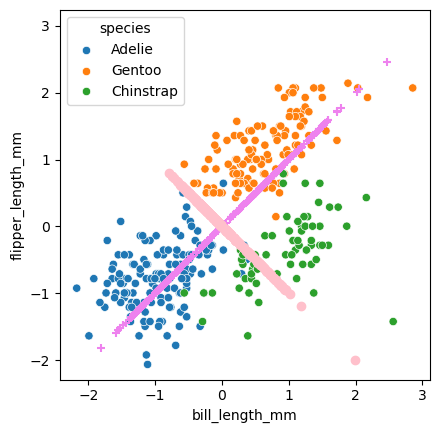

In [23]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)


# Show points projected onto the 1st PC line
X1 = penguins_pca.PC1*pca.components_[0,0]
Y1 = penguins_pca.PC1*pca.components_[0,1]

plt.scatter(X1,Y1, marker = '+', color = 'violet')


# Show points projected onto the 2st PC line
X2 = penguins_pca.PC2*pca.components_[1,0]
Y2 = penguins_pca.PC2*pca.components_[1,1]

plt.scatter(X2,Y2, marker = 'o', color = 'pink')
plt.axis('square')

Below is code that emphasizes the projected points. 

&#9989; **<font color=red>Do this:</font>** the value of `index` below is just picking out a different point in our data set.  Mess around with this number. How do the X and star points move around as you change `index`? 

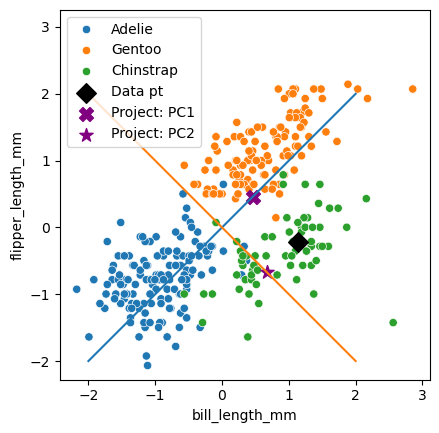

In [28]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)
plt.axis('square')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))

#===========
# Emphasize one point and its projections
#===========

index = 332 #<---------- play with this!

# Here's one data point
plt.scatter([penguins_subset2.iloc[index,0]],
            [penguins_subset2.iloc[index,1]], 
            marker = 'D', color = 'black', s = 100, label = 'Data pt')

# Here's the projection of that point on PC1 (X shape)
plt.scatter([X1[index]], [Y1[index]], 
           marker = 'X', color = 'purple', s = 100, label = 'Project: PC1')

# And here's the projection of that point on PC2 (star)
plt.scatter([X2[index]], [Y2[index]], 
           marker = '*', color = 'purple', s = 100, label = 'Project: PC2')

plt.legend()

Everything we just did is great for understanding what the PCA is doing, but in reality, we're usually going to be looking at the data in the transformed space. 

&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2. Color the points by `penguins.species`. What do you notice about how the points have moved from the (`bill`, `flipper`) scatter plot? 

<Axes: xlabel='PC1', ylabel='PC2'>

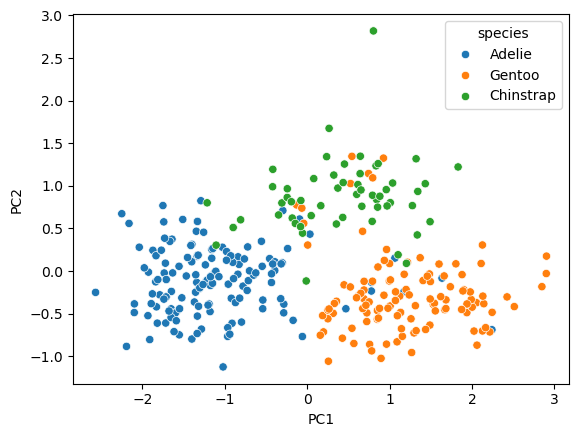

In [35]:
sns.scatterplot(x=penguins_pca['PC1'], y=penguins_pca['PC2'], hue=penguins.species)

## Penguins PCA with all columns

We used only two columns above for visualization, but we can instead use all the input columns to run our PCA. 

In [30]:
penguins_num.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0            39.1           18.7              181.0       3750.0  2007
1            39.5           17.4              186.0       3800.0  2007
2            40.3           18.0              195.0       3250.0  2007
4            36.7           19.3              193.0       3450.0  2007
5            39.3           20.6              190.0       3650.0  2007

In [31]:
pca = PCA(n_components=4)
penguins_pca_all = pca.fit_transform(penguins_num)
penguins_pca_all = pd.DataFrame(data = penguins_pca_all, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4'])
penguins_pca_all

PC1        PC2       PC3       PC4
0   -457.325096 -13.376298  1.247904 -0.376474
1   -407.252228  -9.205245 -0.032667 -1.090217
2   -957.044699   8.128321 -2.491467  0.720823
3   -757.115824   1.838910 -4.880569  2.073668
4   -557.177325  -3.416994 -1.129267  2.629297
..          ...        ...       ...       ...
328 -206.895442  12.507424  9.424523  2.201716
329 -806.944216  13.443905 -1.490242  1.436737
330 -432.103210   0.999033  7.386135 -0.375741
331 -106.881363  12.241310  3.792123  2.298703
332 -432.025413   5.863210  6.502283  0.676175

[333 rows x 4 columns]

&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2 using this new model, and again color the points by `penguins.species`. What do you notice about how the PC plot has changed from the previous setting? 

<Axes: xlabel='PC1', ylabel='PC2'>

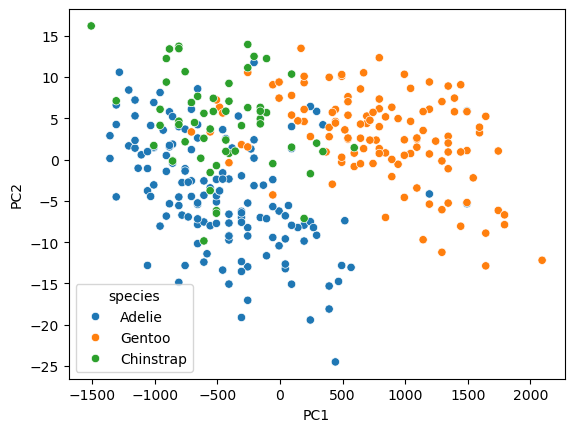

In [36]:
sns.scatterplot(x=penguins_pca_all['PC1'], y=penguins_pca_all['PC2'], hue=penguins.species)



-----
### Congratulations, we're done!
Initially created by Dr. Liz Munch, adapted by Dr. Mengsen Zhang, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.